Gebäude in Potsdam

- Lizenz: Datenlizenz Deutschland Namensnennung 2.0                                            
- Quelle: https://opendata.potsdam.de/explore/dataset/einwohnerzahl-seit-1992/information/?sort=jahr

In [1]:
'''importieren der benötigten module'''
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
'''einlesen der .csv datei'''
df = pd.read_csv("./csv/einwohner.csv",delimiter=';')

#print(f'df') #alles ausgeben
#print(f'item: {df.einwohner_mit_hauptwohnung[0]}') #ein item ausgeben
#print(f'lenght: {len(df.einwohner_mit_hauptwohnung)}\n') #länge ausgeben

'''definieren von "high"/"highYear" und "low"/"lowYear" der einzelnen parameter'''
highestPopulation = 0
highestPopulationYear = 0
'''"low" muss wert >= als teile in liste für filter'''
lowestPopulation = df.gesamt[0]
lowestPopulationYear = 0

highestApartments = 0
highestApartmentsYear = 0
lowestApartments = df.einwohner_mit_hauptwohnung[0]
lowestApartmentsYear = 0

highestAdjoiningApartments = 0
highestAdjoiningApartmentsYear = 0
lowestAdjoiningApartments = df.einwohner_mit_nebenwohnung[0]
lowestAdjoiningApartmentsYear = 0

'''filter nach parameter: "high" und "low" bezogen auf "df.[list]"'''
def filterRowsForYear(listName,high,highY,low,lowY,name):
    for a in range(0, len(listName), 1):
        if listName[a] >= high:
            high = listName[a]
            highY = df.jahr[a]
        if low >= listName[a]:
            low = listName[a]
            lowY = df.jahr[a]
    print(f'highest {name}: {high}, Year: {highY}, lowest {name}: {low}, Year: {lowY}')
    return high, highY, low, lowY

'''übergabe der parameter von "filterRowsForYear()"'''
highestPopulation, highestPopulationYear, lowestPopulation, lowestPopulationYear = filterRowsForYear(df.gesamt,highestPopulation,highestPopulationYear,lowestPopulation,lowestPopulationYear,'Population')
highestApartments, highestApartmentsYear, lowestApartments, lowestApartmentsYear = filterRowsForYear(df.einwohner_mit_hauptwohnung,highestApartments,highestApartmentsYear,lowestApartments,lowestApartmentsYear,'Apartments')
highestAdjoiningApartments, highestAdjoiningApartmentsYear, lowestAdjoiningApartments, lowestAdjoiningApartmentsYear = filterRowsForYear(df.einwohner_mit_nebenwohnung,highestAdjoiningApartments,highestAdjoiningApartmentsYear,lowestAdjoiningApartments,lowestAdjoiningApartmentsYear,'Adjoining Apartments')

#print(f'\nhighest population val: {highestPopulation}\n')

highest Population: 189102, Year: 2021, lowest Population: 134456, Year: 1999
highest Apartments: 183401, Year: 2021, lowest Apartments: 127653, Year: 1999
highest Adjoining Apartments: 10425, Year: 1994, lowest Adjoining Apartments: 5662, Year: 2018


In [3]:
######################sort "jahr"##############################
lJahrGesamt = []
for c in range(0, len(df.jahr), 1):
    lJahrGesamt.append([])
    lJahrGesamt[len(lJahrGesamt)-1].append(df.jahr[c])
    lJahrGesamt[len(lJahrGesamt)-1].append(df.gesamt[c])
lJahrGesamt.sort(reverse=True)
print("\nnach Jahr:" , lJahrGesamt)

###################resplitt in two lists########################
lSplittJahrGesamtJahr = []
lSplittJahrGesamtGesamt = []
for ca in range(0, len(lJahrGesamt), 1):
    lSplittJahrGesamtJahr.append(lJahrGesamt[ca][0])
    lSplittJahrGesamtGesamt.append(lJahrGesamt[ca][1])
#print(lSplittJahrGesamtJahr)
#print(lSplittJahrGesamtGesamt)

##########################sort "gesamt"###########################
lGesamtGesamt = lJahrGesamt.copy()
for d in range(0, len(lGesamtGesamt), 1):
    lGesamtGesamt[d].sort(reverse=True)
lGesamtGesamt.sort(reverse=True)
print("\nnach Gesamt:" ,lGesamtGesamt)

#####################resplitt in two lists#########################
lSplittGesamtGesamtJahr = []
lSplittGesamtGesamtGesamt = []
for da in range(0, len(lGesamtGesamt), 1):
    lSplittGesamtGesamtJahr.append(lGesamtGesamt[da][1])
    lSplittGesamtGesamtGesamt.append(lGesamtGesamt[da][0])
#print(lSplittGesamtGesamtJahr)
#print(lSplittGesamtGesamtGesamt)

###############durchschnittspopulation gesamt################
durchschnitt = 0
for e in range(0, len(df.gesamt), 1):
    durchschnitt += df.gesamt[e]
print(f'\nDurchschnitt: {round((durchschnitt/len(df.gesamt)),2)}')
############################median###########################
print(f'Median: {lGesamtGesamt[int((len(lGesamtGesamt)/2))][0]}')
#######################spannweite############################
print(f'Spannweite: {highestPopulation-lowestPopulation}')
###############differenz zwischen jahren#####################
lCumGesamt = []
lCumJahr = []
print(f'\n{lJahrGesamt}\n')
#lJahrGesamt.sort(reverse=True)
lJahrGesamtReverse = lJahrGesamt
for f in range(len(lJahrGesamtReverse), 0, -1):
    if f != 1:
        print(f'{lJahrGesamtReverse[f-1][1]}:{lJahrGesamtReverse[f-2][0]-lJahrGesamtReverse[f-1][0]} = {lJahrGesamtReverse[f-1][0]} => {lJahrGesamtReverse[f-2][0]-lJahrGesamtReverse[f-1][0] +lJahrGesamtReverse[f-1][0]}')
        lCumGesamt.append(f'{lJahrGesamtReverse[f-2][0]-lJahrGesamtReverse[f-1][0]}')
        lCumJahr.append(lJahrGesamtReverse[f-1][1])
    else:
        print(f'Jahr: {lJahrGesamtReverse[f-1][1]} : {lJahrGesamtReverse[f-1][0]}\n')
print(lCumGesamt)
print(lCumJahr)


nach Jahr: [[2021, 189102], [2020, 187977], [2019, 186241], [2018, 184009], [2017, 181398], [2016, 177421], [2015, 173407], [2014, 169675], [2013, 167151], [2012, 165098], [2011, 163594], [2010, 161650], [2009, 159451], [2008, 158230], [2007, 156321], [2006, 154583], [2005, 153684], [2004, 152135], [2003, 151688], [2002, 137245], [2001, 135859], [2000, 134859], [1999, 134456], [1998, 135778], [1997, 139184], [1996, 143124], [1995, 145676], [1994, 147747], [1993, 149851], [1992, 148589]]

nach Gesamt: [[189102, 2021], [187977, 2020], [186241, 2019], [184009, 2018], [181398, 2017], [177421, 2016], [173407, 2015], [169675, 2014], [167151, 2013], [165098, 2012], [163594, 2011], [161650, 2010], [159451, 2009], [158230, 2008], [156321, 2007], [154583, 2006], [153684, 2005], [152135, 2004], [151688, 2003], [149851, 1993], [148589, 1992], [147747, 1994], [145676, 1995], [143124, 1996], [139184, 1997], [137245, 2002], [135859, 2001], [135778, 1998], [134859, 2000], [134456, 1999]]

Durchschnit

In [4]:
data = {'nach Jahr': lSplittJahrGesamtJahr, 'Einwohner Gesamt': lSplittJahrGesamtGesamt}
showJahr = pd.DataFrame(data)
showJahr

nach Jahr  Einwohner Gesamt
0        2021            189102
1        2020            187977
2        2019            186241
3        2018            184009
4        2017            181398
5        2016            177421
6        2015            173407
7        2014            169675
8        2013            167151
9        2012            165098
10       2011            163594
11       2010            161650
12       2009            159451
13       2008            158230
14       2007            156321
15       2006            154583
16       2005            153684
17       2004            152135
18       2003            151688
19       2002            137245
20       2001            135859
21       2000            134859
22       1999            134456
23       1998            135778
24       1997            139184
25       1996            143124
26       1995            145676
27       1994            147747
28       1993            149851
29       1992            148589

In [5]:
data = {'Jahr': lSplittGesamtGesamtJahr, 'nach Einwohner Gesamt': lSplittGesamtGesamtGesamt}
showGesamt = pd.DataFrame(data)
showGesamt

Jahr  nach Einwohner Gesamt
0   2021                 189102
1   2020                 187977
2   2019                 186241
3   2018                 184009
4   2017                 181398
5   2016                 177421
6   2015                 173407
7   2014                 169675
8   2013                 167151
9   2012                 165098
10  2011                 163594
11  2010                 161650
12  2009                 159451
13  2008                 158230
14  2007                 156321
15  2006                 154583
16  2005                 153684
17  2004                 152135
18  2003                 151688
19  1993                 149851
20  1992                 148589
21  1994                 147747
22  1995                 145676
23  1996                 143124
24  1997                 139184
25  2002                 137245
26  2001                 135859
27  1998                 135778
28  2000                 134859
29  1999                 134456

In [6]:
data = {'highest Population': [highestPopulation, highestPopulationYear], 'lowest Population': [lowestPopulation, lowestPopulationYear], 'highest Apartments:': [highestApartments, highestApartmentsYear], 'lowest Apartments:': [lowestApartments, lowestApartmentsYear], 'highest Adjoining Apartments': [highestAdjoiningApartments, highestAdjoiningApartmentsYear], 'lowest Adjoining Apartments': [lowestAdjoiningApartments, lowestAdjoiningApartmentsYear]}
showJahr = pd.DataFrame(data)
showJahr

highest Population  lowest Population  highest Apartments:  \
0              189102             134456               183401   
1                2021               1999                 2021   

   lowest Apartments:  highest Adjoining Apartments  \
0              127653                         10425   
1                1999                          1994   

   lowest Adjoining Apartments  
0                         5662  
1                         2018

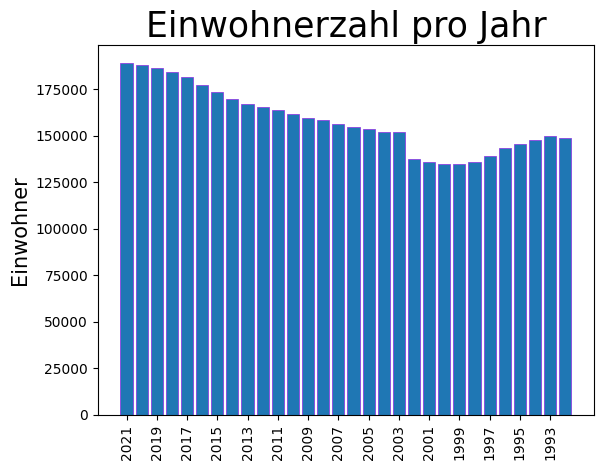

In [7]:
objects = lSplittJahrGesamtGesamt
y_pos = np.arange(len(objects))
performance = objects

plt.bar(y_pos, performance, align='center', alpha=1, edgecolor='blueviolet', linewidth=0.5, width=0.8)
plt.xticks(y_pos, lSplittJahrGesamtJahr, rotation=90)
plt.xticks(np.arange(0, 30, step=2))
plt.ylabel('Einwohner', fontsize=15)
plt.title('Einwohnerzahl pro Jahr', fontsize=25)

plt.show()

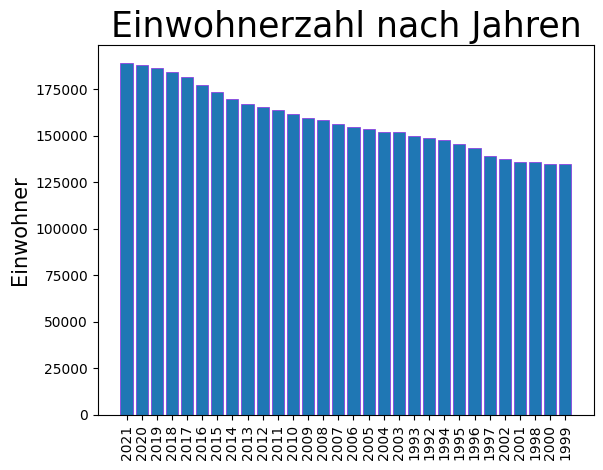

In [8]:
objects = lSplittGesamtGesamtGesamt
y_pos = np.arange(len(objects))
performance = objects

plt.bar(y_pos, performance, align='center', alpha=1, edgecolor='blueviolet', linewidth=0.5, width=0.8)
plt.xticks(y_pos, lSplittGesamtGesamtJahr, rotation=90)
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Einwohner', fontsize=15)
plt.title('Einwohnerzahl nach Jahren', fontsize=25)

plt.show()

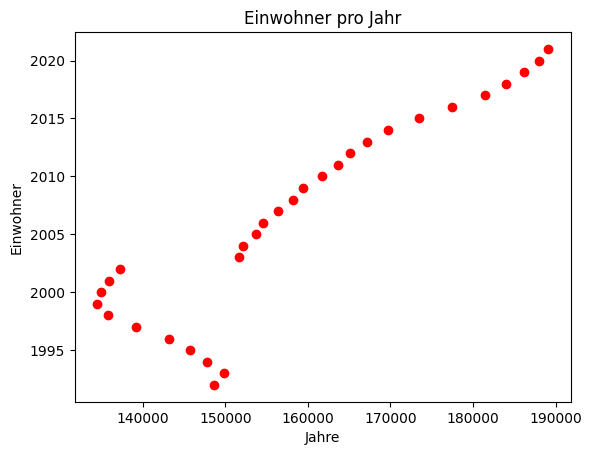

In [9]:
plt.scatter(lSplittGesamtGesamtGesamt,lSplittGesamtGesamtJahr,color="red")
plt.title("Einwohner pro Jahr")
plt.xlabel("Jahre")
plt.ylabel("Einwohner")
plt.show()